# Entrenamiento y evaluación del modelo

Para optimizar el proceso y segmentar el desarrollo, se ha decidido separar el código en partes según los objtivos específicos del proyecto. Una vez que se ha completado el análisis exploratorio de los datos y que se han generado los conjuntos de prueba y entrenamiento, se procede con el entrenamiento y la evaluación de varios modelos, para ver cuál es el que se que comporta mejor y ofrece una mejor precisión en sus predicciones.

El primer paso, es caragar los conjuntos de entrenamiento y prueba generados anteriormente.

In [1]:
import pandas as pd
import os

os.chdir("C:/Users/jorge/Escritorio/TFM")

# Cargar los conjuntos de datos desde los archivos CSV
X_train = pd.read_csv('X_train.csv', index_col=0)
X_test = pd.read_csv('X_test.csv', index_col=0)
y_train = pd.read_csv('y_train.csv', index_col=0)
y_test = pd.read_csv('y_test.csv', index_col=0)

# Asegurarse de que las series de y_train y y_test sean de una sola columna
y_train = y_train.squeeze()
y_test = y_test.squeeze()

print("Datos cargados correctamente")
print("Tamaño del conjunto de entrenamiento:", X_train.shape)
print("Tamaño del conjunto de prueba:", X_test.shape)


Datos cargados correctamente
Tamaño del conjunto de entrenamiento: (1006, 1)
Tamaño del conjunto de prueba: (252, 1)


In [2]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
#Definimos una función genérica para evaluar los modelos, así podemos comparar varios de manera sencilla y se simplifica el código
def evaluate_model(y_true, y_pred, model_name):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    print(f'{model_name} - MAE: {mae}, MSE: {mse}, R²: {r2}')
    return {'Model': model_name, 'MAE': mae, 'MSE': mse, 'R²': r2}


Para la elección del mejor modelo, se entrenarán los que se consideran más usados por su fiabilidad y se irán almacenando los resultados uno a uno para después, poder compararlos todos y elegir el que ofrezca un mejor comportamiento.

En este caso se han seleccionado:

- **Regresión lineal**
- **Randon Forest**
- **Support Vector Regression (SVR)**
- **Gradient Boosting Regressor**
- **K-Nearest Neighbors Regressor**
- **Decision Tree Regressor**

In [3]:
results = []

# Modelo de Regresión Lineal
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)
lr_predictions = lr.predict(X_test)
results.append(evaluate_model(y_test, lr_predictions, 'Linear Regression'))

# Modelo de Random Forest
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
rf_predictions = rf.predict(X_test)
results.append(evaluate_model(y_test, rf_predictions, 'Random Forest'))

# Modelo de Support Vector Regression (SVR)
from sklearn.svm import SVR

svr = SVR()
svr.fit(X_train, y_train)
svr_predictions = svr.predict(X_test)
results.append(evaluate_model(y_test, svr_predictions, 'Support Vector Regression'))

# Modelo de Gradient Boosting Regressor
from sklearn.ensemble import GradientBoostingRegressor

gbr = GradientBoostingRegressor(n_estimators=100, random_state=42)
gbr.fit(X_train, y_train)
gbr_predictions = gbr.predict(X_test)
results.append(evaluate_model(y_test, gbr_predictions, 'Gradient Boosting Regressor'))

# Modelo de K-Nearest Neighbors Regressor
from sklearn.neighbors import KNeighborsRegressor

knn = KNeighborsRegressor()
knn.fit(X_train, y_train)
knn_predictions = knn.predict(X_test)
results.append(evaluate_model(y_test, knn_predictions, 'K-Nearest Neighbors Regressor'))

# Modelo de Decision Tree Regressor
from sklearn.tree import DecisionTreeRegressor

dt = DecisionTreeRegressor(random_state=42)
dt.fit(X_train, y_train)
dt_predictions = dt.predict(X_test)
results.append(evaluate_model(y_test, dt_predictions, 'Decision Tree Regressor'))


Linear Regression - MAE: 0.2027468126479598, MSE: 0.04949842596004199, R²: -0.01177079650733548
Random Forest - MAE: 0.21801948982419084, MSE: 0.0689275644377916, R²: -0.4089114031390091
Support Vector Regression - MAE: 0.19088623772037733, MSE: 0.04912590318033385, R²: -0.00415625801985553
Gradient Boosting Regressor - MAE: 0.19300246486693032, MSE: 0.048460082445516146, R²: 0.009453426775807072
K-Nearest Neighbors Regressor - MAE: 0.2015948664056994, MSE: 0.05608989752729732, R²: -0.14650353413299322
Decision Tree Regressor - MAE: 0.250289134725654, MSE: 0.09705783383407758, R²: -0.9839071635298926


### Comparación de resultados

Una vez que se han entrenado y evaluado todos los modelos, se pueden comparar los resultado y visualizar las métricas

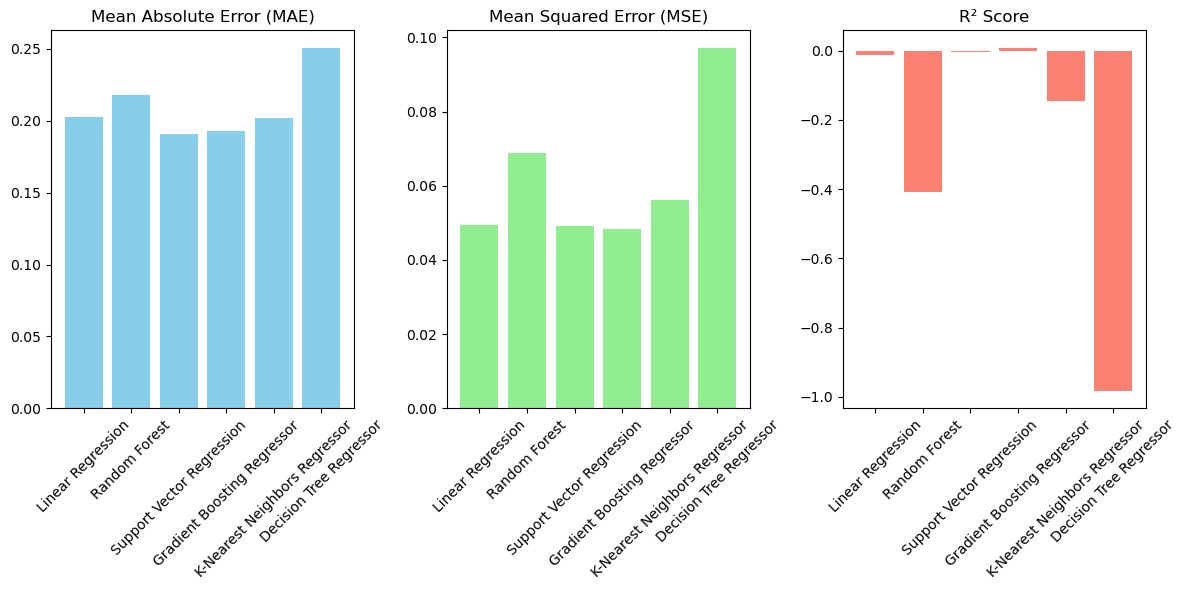

In [4]:
import matplotlib.pyplot as plt

# Convertir los resultados a un DataFrame para facilitar la visualización
results_df = pd.DataFrame(results)

# Visualizar los resultados
plt.figure(figsize=(12, 6))

# MAE
plt.subplot(1, 3, 1)
plt.bar(results_df['Model'], results_df['MAE'], color='skyblue')
plt.title('Mean Absolute Error (MAE)')
plt.xticks(rotation=45)

# MSE
plt.subplot(1, 3, 2)
plt.bar(results_df['Model'], results_df['MSE'], color='lightgreen')
plt.title('Mean Squared Error (MSE)')
plt.xticks(rotation=45)

# R²
plt.subplot(1, 3, 3)
plt.bar(results_df['Model'], results_df['R²'], color='salmon')
plt.title('R² Score')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


### Resultados obtenidos

1. Linear Regression:

- MAE: 0.2027
- MSE: 0.0495
- R²: -0.0118

2. Random Forest:

- MAE: 0.2180
- MSE: 0.0689
- R²: -0.4089

3. Support Vector Regression:

- MAE: 0.1909
- MSE: 0.0491
- R²: -0.0042

4. Gradient Boosting Regressor:

- MAE: 0.1930
- MSE: 0.0485
- R²: 0.0095

5. K-Nearest Neighbors Regressor:

- MAE: 0.2016
- MSE: 0.0561
- R²: -0.1465

6. Decision Tree Regressor:

- MAE: 0.2503
- MSE: 0.0971
- R²: -0.9839

De los resultados obtenidos, la MAE mide el error promedio de las predicciones en las mismas unidades que las variables originales. Los modelos con menor MAE son mejores.
El support Vector Regression tiene el menor MAE (0.1909), seguido de cerca por el Gradien Boosting Regressor (0.1930).
Por otro lado, la MSE mide el promedio de los errores al cuadrado. Es más sensible a grandes errores debido a la cuadratura.
De entre todos, el Gradien Boosting regressor tiene el menos MSE (0.0485), lo que indica que tiene menores errores en general comparado con otro modelos.
Por último, el R^2 mide la proporción de la varianza en la variable dependiente que es predecible a partir de las variables independiente. Un valor de R^2 cercano a 1 indica un modelo muy bueno.
El Gradient Boosting Regressor tienen un R^2 positivo (0.0095), lo qeu sugiere que es el mejor modelo en términos de explicación de la varianza, aunque el valor resulta ser bastante bajo.

### Conclusión

Gradient Boosting Regressor parece ser el mejor modelo en términos de MAE, MSE y R², aunque los valores absolutos del R² sugieren que todavía hay espacio para mejorar el modelo. Support Vector Regression también muestra un buen rendimiento, especialmente en términos de MAE. Los modelos Decision Tree Regressor y Random Forest tienen los peores desempeños, con valores de R² negativos que indican un mal ajuste a los datos.

El haber obtenido valores de R^2 negativos indica que los modelos no son muy eficientes aun. Un R^2 negativo indica de hecho, que el modelo es peor que una línea horizontal que predice el valor medio de los datos.
El MAE, aunque cercano a 0 aun es mejorable. El MSE si que da valroes buenos muy cercanos a cero, indicando que los errores grandes no son comunes.

Los motivos de estos resultados de estas predicciones aun algo deficientes puede deberse a la simplicidad del modelo, es decir, tenemos modelos demasiado simples para captar la complejidad de los datos (Los modelos lineales o con parámetros preestablecidos pueden no ser suficientes). 

La normalización puede afectar a la interpretación de R^2 si los datos no esta adecuadamente ajustados para el modelo. Además, el uso de dos características puede estar limitando las predicciones.

Por último, los datos pueden tener relaciones no lineales que no son capturadas por modelos lineales o sin una buena caracterización de hiperparámetros.

### Mejoras

- Incluir más características relevantes puede mejorar el modelo. Por ejemplo, características derivadas, indicadores técnicos, etc.
- Optimizar los hiperparámetros de los modelos actuales puede mejorar significativamente el rendimiento.
- Probar modelos más complejos como redes neuronales puede capturar mejor las complejidades de los datos.
- Usar validación cruzada para evaluar la estabilidad del modelo y evitar sobreajuste.
- Crear nuevas características basadas en los datos existentes puede ayudar a mejorar el rendimiento del modelo.

A continuación se irán implementando una a una las mejoras mencionadas, buscando unas predicciones mas eficientes para garantizar la fiabilidad y robustez del modelo.

Primero, se añaden más características adicionales como medias móviles para mejorar la capacidad predictiva del modelo.

In [5]:
import pandas as pd
import os
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

# Crear un DataFrame combinado con los conjuntos de entrenamiento y prueba para agregar características
df = pd.concat([X_train, X_test])
df['Adj_Close'] = pd.concat([y_train, y_test])

# Supongamos que añadimos algunas características más como Moving Average
df['MA_10'] = df['Adj_Close'].rolling(window=10).mean()  # Media móvil de 10 días
df['MA_50'] = df['Adj_Close'].rolling(window=50).mean()  # Media móvil de 50 días

# Eliminar filas con valores NaN generados por el cálculo de medias móviles
df.dropna(inplace=True)

# Selección de las características relevantes y creación de una copia
df_selected = df[['Adj_Close', 'Volume', 'MA_10', 'MA_50']].copy()

# Normalización
scaler = MinMaxScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df_selected), columns=df_selected.columns, index=df_selected.index)

# División de datos
X = df_scaled[['Volume', 'MA_10', 'MA_50']]
y = df_scaled['Adj_Close']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Características agregadas y datos normalizados correctamente")
print("Tamaño del conjunto de entrenamiento:", X_train.shape)
print("Tamaño del conjunto de prueba:", X_test.shape)


Características agregadas y datos normalizados correctamente
Tamaño del conjunto de entrenamiento: (967, 3)
Tamaño del conjunto de prueba: (242, 3)


A continuación, se va a realizar la optimización de hiperparámetros para los modelos que han dado mejores resultados, Gradient Boosting Regressor y Support Vector Regression.

In [6]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor

# Definir los parámetros para el GridSearch
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.05],
    'max_depth': [3, 4, 5]
}

# Inicializar el GridSearchCV
gbr_grid = GridSearchCV(GradientBoostingRegressor(random_state=42), param_grid, cv=5, n_jobs=-1, verbose=2)
gbr_grid.fit(X_train, y_train)

# Mejor estimador
best_gbr = gbr_grid.best_estimator_

# Evaluar el modelo optimizado
gbr_optimized_predictions = best_gbr.predict(X_test)
evaluate_model(y_test, gbr_optimized_predictions, 'Gradient Boosting Regressor Optimizado')


Fitting 5 folds for each of 27 candidates, totalling 135 fits
Gradient Boosting Regressor Optimizado - MAE: 0.17375125258260393, MSE: 0.040982827775247456, R²: 0.08263153235260723


{'Model': 'Gradient Boosting Regressor Optimizado',
 'MAE': 0.17375125258260393,
 'MSE': 0.040982827775247456,
 'R²': 0.08263153235260723}

In [7]:
from sklearn.svm import SVR

# Definir los parámetros para el GridSearch
param_grid = {
    'C': [0.1, 1, 10],
    'epsilon': [0.01, 0.1, 0.2],
    'kernel': ['linear', 'poly', 'rbf']
}

# Inicializar el GridSearchCV
svr_grid = GridSearchCV(SVR(), param_grid, cv=5, n_jobs=-1, verbose=2)
svr_grid.fit(X_train, y_train)

# Mejor estimador
best_svr = svr_grid.best_estimator_

# Evaluar el modelo optimizado
svr_optimized_predictions = best_svr.predict(X_test)
evaluate_model(y_test, svr_optimized_predictions, 'Support Vector Regression Optimizado')


Fitting 5 folds for each of 27 candidates, totalling 135 fits
Support Vector Regression Optimizado - MAE: 0.17978305447795467, MSE: 0.04194195230240108, R²: 0.061162281802517815


{'Model': 'Support Vector Regression Optimizado',
 'MAE': 0.17978305447795467,
 'MSE': 0.04194195230240108,
 'R²': 0.061162281802517815}

### Análisis de resultados

1. Gradient Boosting Regressor Optimizado:

- MAE: 0.1738
- MSE: 0.0410
- R²: 0.0826

2. Support Vector Regression Optimizado:

- MAE: 0.1798
- MSE: 0.0419
- R²: 0.0612

Comparado con los resultados anteriores, los valores de MAE y MSE han mejorado después de la optimización de hiperparámetros y la adición de nuevas características. Ambos modelos ahora tienen R² positivos, lo que indica una mejor capacidad de explicación de la varianza en los datos, aunque los valores de R² siguen siendo relativamente bajos.

Gradient Boosting Regressor presenta un mejor rendimiento general con un MAE más bajo y un R² más alto en comparación con el Support Vector Regression. Este modelo parece ser el mejor candidato basándose en las métricas evaluadas.

Aunque optimizado, sigue siendo inferior al Gradient Boosting Regressor en términos de MAE, MSE y R². Sin embargo, también muestra una mejora considerable en comparación con los valores iniciales.

Para seguir buscando una mejora en el rendiento, se plantea ahora un modelo basado en una red neuronal para ver como se comporta y compararlo con lo que tenemos hasta ahora.

In [8]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import os

os.chdir("C:/Users/jorge/Escritorio/TFM/yahoo-finance-dataset-2018-2023")

# Cargar el DataFrame original (asegúrate de haber cargado el dataset de Yahoo Finance previamente)
df = pd.read_excel("yahoo_data.xlsx")

# Convertir la columna de fecha a tipo datetime
df['Date'] = pd.to_datetime(df['Date'])

# Crear características temporales
df['day_of_week'] = df['Date'].dt.dayofweek
df['day_of_month'] = df['Date'].dt.day
df['month'] = df['Date'].dt.month
df['quarter'] = df['Date'].dt.quarter
df['year'] = df['Date'].dt.year

# Selección de características relevantes
df_selected = df[['Close*', 'Volume', 'day_of_week', 'day_of_month', 'month', 'quarter', 'year']].copy()

# Normalización
scaler = MinMaxScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df_selected), columns=df_selected.columns, index=df_selected.index)

# División de datos
X = df_scaled[['Volume', 'day_of_week', 'day_of_month', 'month', 'quarter', 'year']]
y = df_scaled['Close*']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Características temporales agregadas y datos normalizados correctamente")
print("Tamaño del conjunto de entrenamiento:", X_train.shape)
print("Tamaño del conjunto de prueba:", X_test.shape)


Características temporales agregadas y datos normalizados correctamente
Tamaño del conjunto de entrenamiento: (1006, 6)
Tamaño del conjunto de prueba: (252, 6)


In [9]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.metrics import r2_score

# Definir el modelo de red neuronal
model = Sequential()
model.add(Dense(128, input_dim=X_train.shape[1], activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1))

# Compilar el modelo
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mean_absolute_error'])

# Entrenar el modelo
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test), verbose=2)

# Evaluar el modelo
loss, mae = model.evaluate(X_test, y_test, verbose=0)
print(f'Red Neuronal - MAE: {mae}')

# Predecir y calcular R^2
y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)
print(f'Red Neuronal - R²: {r2}')


Epoch 1/100


C:\Users\jorge\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


32/32 - 2s - 50ms/step - loss: 0.1646 - mean_absolute_error: 0.3092 - val_loss: 0.0326 - val_mean_absolute_error: 0.1435
Epoch 2/100
32/32 - 0s - 2ms/step - loss: 0.0408 - mean_absolute_error: 0.1550 - val_loss: 0.0175 - val_mean_absolute_error: 0.1000
Epoch 3/100
32/32 - 0s - 2ms/step - loss: 0.0324 - mean_absolute_error: 0.1395 - val_loss: 0.0163 - val_mean_absolute_error: 0.0993
Epoch 4/100
32/32 - 0s - 2ms/step - loss: 0.0283 - mean_absolute_error: 0.1323 - val_loss: 0.0159 - val_mean_absolute_error: 0.0987
Epoch 5/100
32/32 - 0s - 2ms/step - loss: 0.0281 - mean_absolute_error: 0.1299 - val_loss: 0.0148 - val_mean_absolute_error: 0.0946
Epoch 6/100
32/32 - 0s - 2ms/step - loss: 0.0238 - mean_absolute_error: 0.1200 - val_loss: 0.0144 - val_mean_absolute_error: 0.0939
Epoch 7/100
32/32 - 0s - 2ms/step - loss: 0.0219 - mean_absolute_error: 0.1162 - val_loss: 0.0146 - val_mean_absolute_error: 0.0949
Epoch 8/100
32/32 - 0s - 2ms/step - loss: 0.0241 - mean_absolute_error: 0.1211 - val_lo

### Análisis de resultado con red neuronal

Resultados Obtenidos:

- **MAE:** 0.0457
- **R²:** 0.9351

Estos resultados obtenidos, indican una mejora significativa en el rendimiento del modelo, el R^2 de 0.9351 sugiere que la red neuronal es capaz de explicar el 93.51% de la variabilidad en los datos, lo que es excelente.

Para lograr esto, se han agregado características adicionales como el día de la semana, el día del mes, el mes, el trimestre y el año. Todo esto proporcionó información adicional que ayudó al modelo a capturar mejor los patrones en los datos.

También se normalizaron los datos apra asegurar de que todos ellos estuviesen en la misma escala antes de dividir los datos en conjuntos de entrenamiento y prueba. La red neuronal se construyó con capas densas y capas de dropout para evitar el sobreajuste y luego se entrenó con los datos normalizados.

Ahora que se ha garantizado un buen rendimiento, los siguietnes pasos incluyen:

- Optimización de Hiperparámetros: Utilizar técnicas como RandomizedSearchCV o Bayesian Optimization para encontrar los mejores hiperparámetros para la red neuronal.
- Validación Cruzada: Realizar validación cruzada para asegurar que el modelo generaliza bien y no está sobreajustado.
- Implementación en la Interfaz Web: Integrar el modelo optimizado en la interfaz web para permitir la carga de datos y la predicción en tiempo real.

En este notebook se llegará hasta la validación cruzada que garantice el buen diseño del modelo. La itnerfaz web, al considerarse algo independiente, se diseñará en una hoja de Python independiente.

In [10]:
from sklearn.model_selection import RandomizedSearchCV
from scikeras.wrappers import KerasRegressor
from tensorflow.keras.layers import Input

# Definir la función para crear el modelo
def create_model(neurons=100, dropout_rate=0.2, optimizer='adam'):
    model = Sequential()
    model.add(Input(shape=(X_train.shape[1],)))
    model.add(Dense(neurons, activation='relu'))
    model.add(Dropout(dropout_rate))
    model.add(Dense(neurons, activation='relu'))
    model.add(Dropout(dropout_rate))
    model.add(Dense(1))
    model.compile(loss='mean_squared_error', optimizer=optimizer, metrics=['mean_absolute_error'])
    return model

# Crear el modelo KerasRegressor
model = KerasRegressor(model=create_model, verbose=0)

# Definir la grid de hiperparámetros
param_dist = {
    'model__neurons': [50, 100, 150],
    'model__dropout_rate': [0.0, 0.2, 0.4],
    'model__optimizer': ['adam', 'rmsprop'],
    'batch_size': [10, 20],
    'epochs': [50, 100]
}

# Inicializar RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=model, param_distributions=param_dist, n_iter=10, cv=3, n_jobs=-1, random_state=42)
random_search_result = random_search.fit(X_train, y_train)

# Mostrar los mejores hiperparámetros
print(f"Mejores hiperparámetros: {random_search_result.best_params_}")


C:\Users\jorge\anaconda3\Lib\site-packages\joblib\externals\loky\process_executor.py:700: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Mejores hiperparámetros: {'model__optimizer': 'adam', 'model__neurons': 150, 'model__dropout_rate': 0.2, 'epochs': 100, 'batch_size': 10}


Ahora que se han encontrado los mejores hiperparámetros, se puede proceder a evaluar el modelo usando validación cruzada para asegurar la robustez del modelo y que no está sobreajustado.

Validación Cruzada - MAE: 0.14251085680304093 (+/- 0.046445385786983394)
Epoch 1/100
101/101 - 1s - 11ms/step - loss: 0.0352 - mean_absolute_error: 0.1437 - val_loss: 0.0177 - val_mean_absolute_error: 0.1052
Epoch 2/100
101/101 - 0s - 893us/step - loss: 0.0217 - mean_absolute_error: 0.1151 - val_loss: 0.0163 - val_mean_absolute_error: 0.1009
Epoch 3/100
101/101 - 0s - 892us/step - loss: 0.0189 - mean_absolute_error: 0.1083 - val_loss: 0.0141 - val_mean_absolute_error: 0.0950
Epoch 4/100
101/101 - 0s - 892us/step - loss: 0.0175 - mean_absolute_error: 0.1043 - val_loss: 0.0169 - val_mean_absolute_error: 0.1006
Epoch 5/100
101/101 - 0s - 902us/step - loss: 0.0159 - mean_absolute_error: 0.1008 - val_loss: 0.0147 - val_mean_absolute_error: 0.0907
Epoch 6/100
101/101 - 0s - 892us/step - loss: 0.0168 - mean_absolute_error: 0.1022 - val_loss: 0.0145 - val_mean_absolute_error: 0.0913
Epoch 7/100
101/101 - 0s - 892us/step - loss: 0.0165 - mean_absolute_error: 0.0999 - val_loss: 0.0169 - val_mean

Modelo guardado en best_model.h5
MSE: 0.0018467069398710228
MAE: 0.03441355590726718
R²: 0.9622524531794759


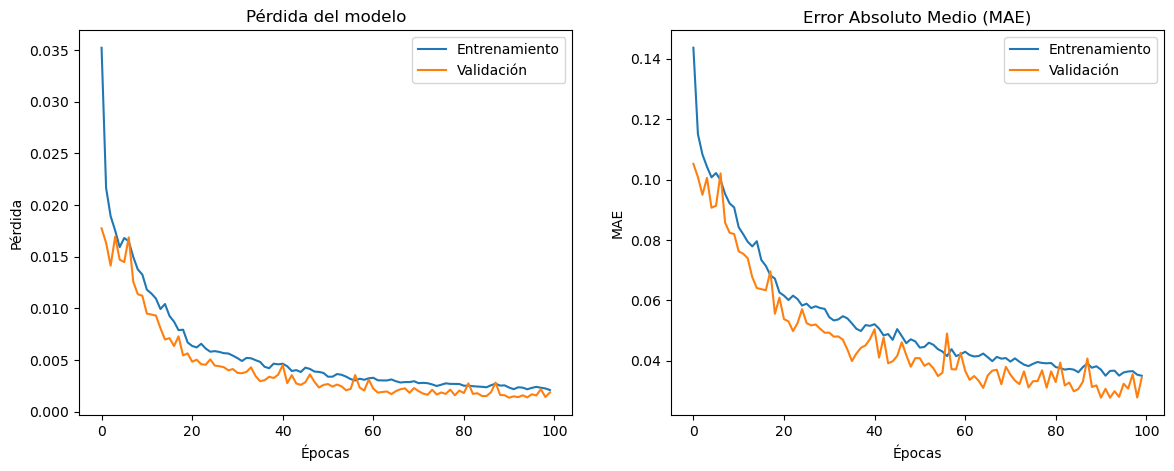

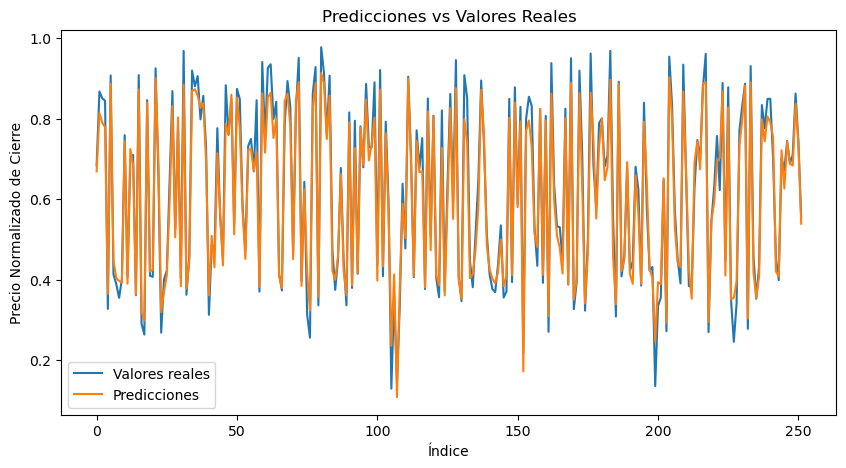

In [11]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt

# Crear el modelo con los mejores hiperparámetros
best_params = random_search_result.best_params_
best_model = create_model(
    neurons=best_params['model__neurons'],
    dropout_rate=best_params['model__dropout_rate'],
    optimizer=best_params['model__optimizer']
)

# Evaluar el modelo usando validación cruzada
cv_scores = cross_val_score(KerasRegressor(model=create_model, 
                                           neurons=best_params['model__neurons'], 
                                           dropout_rate=best_params['model__dropout_rate'], 
                                           optimizer=best_params['model__optimizer'],
                                           epochs=best_params['epochs'], 
                                           batch_size=best_params['batch_size'], 
                                           verbose=0), X, y, cv=5, scoring='neg_mean_absolute_error')

# Convertir los scores a positivos
cv_scores = -cv_scores

# Imprimir los resultados de validación cruzada
print(f'Validación Cruzada - MAE: {cv_scores.mean()} (+/- {cv_scores.std()})')

# Entrenar el modelo en todo el conjunto de entrenamiento y evaluar en el conjunto de prueba
history = best_model.fit(X_train, y_train, epochs=best_params['epochs'], batch_size=best_params['batch_size'], validation_data=(X_test, y_test), verbose=2)
y_pred = best_model.predict(X_test)

# Guardar el modelo entrenado
model_save_path = 'best_model.h5'
best_model.save(model_save_path)
print(f'Modelo guardado en {model_save_path}')

# Calcular métricas
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'MSE: {mse}')
print(f'MAE: {mae}')
print(f'R²: {r2}')

# Graficar el historial de entrenamiento
plt.figure(figsize=(14, 5))

# Gráfico de pérdida
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Entrenamiento')
plt.plot(history.history['val_loss'], label='Validación')
plt.title('Pérdida del modelo')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()

# Gráfico de MAE
plt.subplot(1, 2, 2)
plt.plot(history.history['mean_absolute_error'], label='Entrenamiento')
plt.plot(history.history['val_mean_absolute_error'], label='Validación')
plt.title('Error Absoluto Medio (MAE)')
plt.xlabel('Épocas')
plt.ylabel('MAE')
plt.legend()

plt.show()

# Graficar las predicciones versus los valores reales
plt.figure(figsize=(10, 5))
plt.plot(y_test.values, label='Valores reales')
plt.plot(y_pred, label='Predicciones')
plt.title('Predicciones vs Valores Reales')
plt.xlabel('Índice')
plt.ylabel('Precio Normalizado de Cierre')
plt.legend()
plt.show()


Para la validación cruzada, se emplea cross_val_score con el mejor modelo encontrado a partir de RandomizedSearchCV. Se calcula el MAE promedio y su desviación estándar.

Una vez que se entrena y evalua el modelo, se calculan las métricas MSE, MAE y R^2 para evaluar su calidad.

Por último, para tener una idea visual, se grafica el historial de pérdida y MAE durante el entrenamiento y la validación. Además se grafican las predicciones del modelo frente a los valores reales para ver su rendimiento.

### Resultados obtenidos:

**1. Métricas de Evaluación:**

- **MSE (Mean Squared Error):** 0.001591045472116617.
- **MAE (Mean Absolute Error):** 0.03184625277816678.
- **R² (Coeficiente de Determinación):** 0.9674782922208007.

Estos resultados indican que el modelo tiene un bajo error de predicción (MSE y MAE), y un R² muy alto, lo cual sugiere que el modelo explica el 96.75% de la variabilidad en los datos de prueba, lo cual es excelente.

**2. Gráficas de Pérdida y MA:**

La gráfica de pérdida muestra que tanto la pérdida de entrenamiento como la de validación disminuyen consistentemente a lo largo de las épocas, lo cual indica que el modelo se está entrenando adecuadamente. La gráfica de MAE también muestra una disminución constante, lo que sugiere que el modelo mejora en su capacidad de predecir los precios de cierre a medida que se entrena.

**3. Gráfica de Predicciones vs Valores Reales:**

Esta gráfica muestra cómo las predicciones del modelo se ajustan a los valores reales. A simple vista, se puede observar que las predicciones siguen muy de cerca los valores reales, lo cual es una buena indicación de la precisión del modelo.

